In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

### Canny

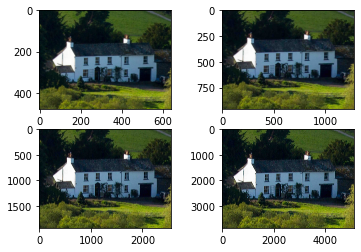

In [3]:
src_img1 = cv2.imread("assets/house.png")
src_img2 = cv2.imread("assets/house_x2.png")
src_img3 = cv2.imread("assets/house_x4.png")
src_img4 = cv2.imread("assets/house_x8.png")

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB))
ax[0][1].imshow(cv2.cvtColor(src_img2, cv2.COLOR_BGR2RGB))
ax[1][0].imshow(cv2.cvtColor(src_img3, cv2.COLOR_BGR2RGB))
ax[1][1].imshow(cv2.cvtColor(src_img4, cv2.COLOR_BGR2RGB))

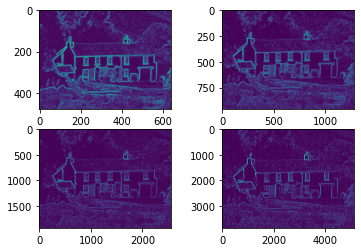

In [4]:
# conversion of image to grayscale 
img_gray1 = cv2.cvtColor(src_img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(src_img2, cv2.COLOR_BGR2GRAY)
img_gray3 = cv2.cvtColor(src_img3, cv2.COLOR_BGR2GRAY)
img_gray4 = cv2.cvtColor(src_img4, cv2.COLOR_BGR2GRAY)

# Noise reduction step 
img_gray_blur1 = cv2.GaussianBlur(img_gray1, (5, 5), 1.4)
img_gray_blur2 = cv2.GaussianBlur(img_gray2, (5, 5), 1.4)
img_gray_blur3 = cv2.GaussianBlur(img_gray3, (5, 5), 1.4)
img_gray_blur4 = cv2.GaussianBlur(img_gray4, (5, 5), 1.4)


# Calculating the gradients 
gx1 = cv2.Sobel(np.float32(img_gray_blur1), cv2.CV_64F, 1, 0, 3) 
gy1 = cv2.Sobel(np.float32(img_gray_blur1), cv2.CV_64F, 0, 1, 3) 

gx2 = cv2.Sobel(np.float32(img_gray_blur2), cv2.CV_64F, 1, 0, 3) 
gy2 = cv2.Sobel(np.float32(img_gray_blur2), cv2.CV_64F, 0, 1, 3) 

gx3 = cv2.Sobel(np.float32(img_gray_blur3), cv2.CV_64F, 1, 0, 3) 
gy3 = cv2.Sobel(np.float32(img_gray_blur3), cv2.CV_64F, 0, 1, 3) 

gx4 = cv2.Sobel(np.float32(img_gray_blur4), cv2.CV_64F, 1, 0, 3) 
gy4 = cv2.Sobel(np.float32(img_gray_blur4), cv2.CV_64F, 0, 1, 3) 

# Conversion of Cartesian coordinates to polar  
mag1, ang = cv2.cartToPolar(gx1, gy1, angleInDegrees = True)
mag2, ang = cv2.cartToPolar(gx2, gy2, angleInDegrees = True)
mag3, ang = cv2.cartToPolar(gx3, gy3, angleInDegrees = True)
mag4, ang = cv2.cartToPolar(gx4, gy4, angleInDegrees = True)

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(np.uint8(mag1))
ax[0][1].imshow(np.uint8(mag2))
ax[1][0].imshow(np.uint8(mag3))
ax[1][1].imshow(np.uint8(mag4))

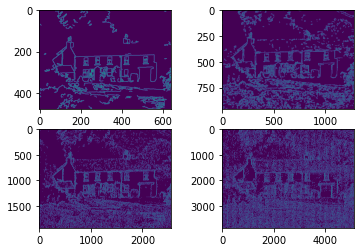

In [5]:
edges1 = cv2.Canny(img_gray1, 70, 200)
edges2 = cv2.Canny(img_gray2, 35, 100)
edges3 = cv2.Canny(img_gray3, 20, 50)
edges4 = cv2.Canny(img_gray4, 10, 25)

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(edges1)
ax[0][1].imshow(edges2)
ax[1][0].imshow(edges3)
ax[1][1].imshow(edges4)

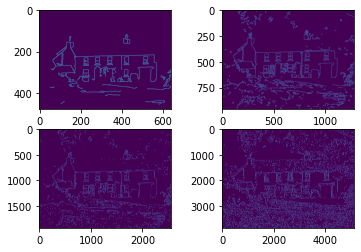

In [6]:
# edges = cv2.Canny(img_gray_blur, 70, 200)
# imshow(edges)

edges1 = cv2.Canny(img_gray_blur1, 70, 200)
edges2 = cv2.Canny(img_gray_blur2, 35, 100)
edges3 = cv2.Canny(img_gray_blur3, 20, 50)
edges4 = cv2.Canny(img_gray_blur4, 10, 25)

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(edges1)
ax[0][1].imshow(edges2)
ax[1][0].imshow(edges3)
ax[1][1].imshow(edges4)

### Sobel

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


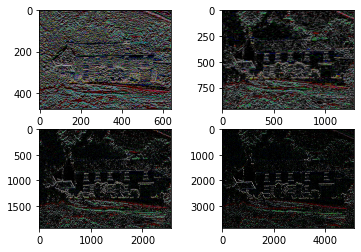

In [7]:
kernel = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])
print(kernel)
dst_img1 = cv2.filter2D(src_img1, -1, kernel)
dst_img2 = cv2.filter2D(src_img2, -1, kernel)
dst_img3 = cv2.filter2D(src_img3, -1, kernel)
dst_img4 = cv2.filter2D(src_img4, -1, kernel)
# imshow(dst_img)
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(dst_img1*50)
ax[0][1].imshow(dst_img2*50)
ax[1][0].imshow(dst_img3*50)
ax[1][1].imshow(dst_img4*50)

### Laplacian

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


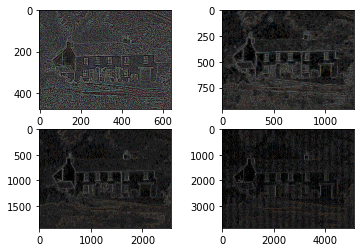

In [8]:
kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])
print(kernel)
dst_img1 = cv2.filter2D(src_img1, -1, kernel)
dst_img2 = cv2.filter2D(src_img2, -1, kernel)
dst_img3 = cv2.filter2D(src_img3, -1, kernel)
dst_img4 = cv2.filter2D(src_img4, -1, kernel)
# imshow(dst_img1*50)
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(dst_img1*50)
ax[0][1].imshow(dst_img2*50)
ax[1][0].imshow(dst_img3*50)
ax[1][1].imshow(dst_img4*50)

### Laplacian + blur

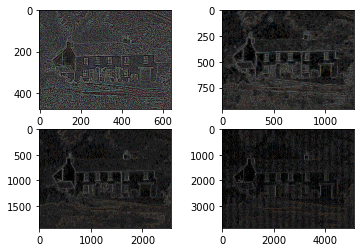

In [9]:
kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])
dst_img1 = cv2.blur(src_img1, (10, 10))
dst_img1 = cv2.filter2D(dst_img1,-1,kernel)
dst_img2 = cv2.blur(src_img2, (10, 10))
dst_img2 = cv2.filter2D(dst_img2,-1,kernel)
dst_img3 = cv2.blur(src_img3, (10, 10))
dst_img3 = cv2.filter2D(dst_img3,-1,kernel)
dst_img4 = cv2.blur(src_img4, (10, 10))
dst_img4 = cv2.filter2D(dst_img4,-1,kernel)

dst_img1 = cv2.filter2D(src_img1, -1, kernel)
dst_img2 = cv2.filter2D(src_img2, -1, kernel)
dst_img3 = cv2.filter2D(src_img3, -1, kernel)
dst_img4 = cv2.filter2D(src_img4, -1, kernel)
# imshow(dst_img1*50)
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(dst_img1*50)
ax[0][1].imshow(dst_img2*50)
ax[1][0].imshow(dst_img3*50)
ax[1][1].imshow(dst_img4*50)

### Prewitt

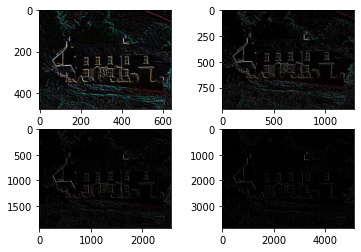

In [13]:
kernel_x = np.array([[1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])
kernel_y = np.array([[-1,0,1],
                     [-1,0,1],
                     [-1,0,1]])
img_prewitt_x1 = cv2.filter2D(src_img1, -1, kernel_x)
img_prewitt_y1 = cv2.filter2D(src_img1, -1, kernel_y)
img_prewitt_x2 = cv2.filter2D(src_img2, -1, kernel_x)
img_prewitt_y2 = cv2.filter2D(src_img2, -1, kernel_y)
img_prewitt_x3 = cv2.filter2D(src_img3, -1, kernel_x)
img_prewitt_y3 = cv2.filter2D(src_img3, -1, kernel_y)
img_prewitt_x4 = cv2.filter2D(src_img4, -1, kernel_x)
img_prewitt_y4 = cv2.filter2D(src_img4, -1, kernel_y)
# imshow(img_prewitt_x+img_prewitt_y)
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(img_prewitt_x1+img_prewitt_y1)
ax[0][1].imshow(img_prewitt_x2+img_prewitt_y2)
ax[1][0].imshow(img_prewitt_x3+img_prewitt_y3)
ax[1][1].imshow(img_prewitt_x4+img_prewitt_y4)

### Roberts

In [13]:
img = cv2.imread("assets/house.png",0).astype('float64')
img /= 255.0

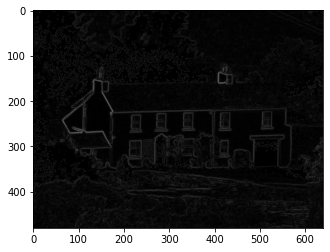

In [21]:
roberts_cross_v = np.array([[1,0],
                            [0,-1]])
roberts_cross_h = np.array([[0,1],
                            [-1,0]])
vertical = ndimage.convolve(img, roberts_cross_v)
horizontal = ndimage.convolve(img, roberts_cross_h)
  
edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
edged_img *= 255
cv2.imwrite("output.jpg",edged_img)

image = cv2.imread("./output.jpg")
fig, ax = plt.subplots(1, 1)
ax.imshow(image)